In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

In [2]:
import random

# 国税庁が公表している年収帯ごとの分布（keyが年収、valueが人数）
# 0が入らないように下限を1に設定しています
stats = {
    1: 4116, 100: 7192, 200: 7802, 300: 8379, 400: 6777,
    500: 4629, 600: 2837, 700: 1946, 800: 1314, 900: 854,
    1000: 1539, 1500: 335, 2000: 101, 2500: 78, 3000: 39
}

# 上記データを元にランダムに年収データを生成する
data = list()

for k, v in stats.items():
    for i in range(v):
        if k >= 1000:
            term = 500
        else:
            term = 100

        data.append(k + int(random.random() * term))

In [3]:
m = np.mean(data)
v = np.var(data)
mu = np.log(m / np.sqrt(1 + v / (m ** 2)))

In [4]:
var = np.log(1 + np.var(data) / (np.mean(data) ** 2))
sigma = np.sqrt(var)

In [5]:
def lognormal_dist(x):
    """
    対数正規分布
    :param x: x
    :return: 対数正規分布
    """
    # eより前の部分
    a = (1 / (np.sqrt(2 * np.pi) * sigma * x))

    # eより後の部分
    b = (np.e ** (- ((math.log(x) - mu) ** 2) / (2 * sigma ** 2)))

    return a * b

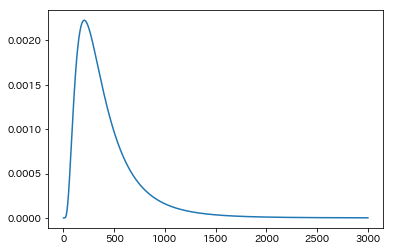

In [6]:
# 1〜3000までの間を1刻みで値を取ることにします
r = np.arange(1, 3001, 1)

# 自作したlog_normal_dist関数を1〜3000に対して実行します
v = [lognormal_dist(i) for i in r]

# 結果をplotします
plt.plot(r, v)

In [7]:
from scipy.stats import lognorm

# SciPyで年収500万の確率を求める
s, loc, scale = lognorm.fit(data, floc=0)

pd.DataFrame([[lognorm.pdf(500, s, loc=loc, scale=scale)],
              [lognormal_dist(500)]], index=['scipy.stats.lognorm', '独自関数'], columns=['確率'])

,確率
scipy.stats.lognorm,0.000760
独自関数,0.000966


In [8]:
# 解答例

mu = np.mean(np.log(data))
var = np.var(np.log(data))
sigma = np.sqrt(var)


def lognormal_dist2(x):
    """
    対数正規分布 (SciPy準拠)
    :param x: x
    :return: 対数正規分布 (SciPy準拠)
    """
    # eより前の部分
    a = (1 / (np.sqrt(2 * np.pi) * sigma * x))

    # eより後の部分
    b = (np.e ** (- ((math.log(x) - mu) ** 2) / (2 * sigma ** 2)))

    return a * b


lognormal_dist2(500)

0.0007602330974117206